<a href="https://colab.research.google.com/github/AdityaB1234/StockPredictors/blob/main/Hourly_Stock_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import yfinance as yfin
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt

company = "DIS"
yfin.pdr_override()

In [ ]:
hour_test = yfin.download(tickers=company,interval = '1h', start="2023-7-18", end="2023-8-18")
hour_test.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-07-18 09:30:00-04:00,85.510002,87.300003,85.309998,86.635002,86.635002,5826020
2023-07-18 10:30:00-04:00,86.639999,86.660004,86.180000,86.220001,86.220001,2230787
2023-07-18 11:30:00-04:00,86.209999,86.260002,85.632103,85.760002,85.760002,2088755
2023-07-18 12:30:00-04:00,85.760002,85.790001,85.440002,85.449997,85.449997,2414434
2023-07-18 13:30:00-04:00,85.449997,86.290001,85.309998,86.280998,86.280998,2498146


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_info = scaler.fit_transform(hour_test["Close"].values.reshape(-1,1))

In [ ]:
x_train = []
y_train = []
prediction_hours = 60

In [ ]:
for i in range(prediction_hours, len(scaled_info)):
    x_train.append(scaled_info[i-prediction_hours:i,0] )
    y_train.append(scaled_info[i,0])


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1 ))

In [ ]:
model = Sequential()
model.add(LSTM(units=25, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=25, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=25, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=25, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=25, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=25, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=25, return_sequences=False, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=16)
hour_Real = yfin.download(company, interval="1h", start="2023-8-18", end ="2023-9-18")

Epoch 1/50
7/7 [==============================] - 18s 185ms/step - loss: 0.1460
Epoch 2/50
7/7 [==============================] - 1s 181ms/step - loss: 0.0616
Epoch 3/50
7/7 [==============================] - 2s 276ms/step - loss: 0.0621
Epoch 4/50
7/7 [==============================] - 2s 238ms/step - loss: 0.0576
Epoch 5/50
7/7 [==============================] - 1s 193ms/step - loss: 0.0539
Epoch 6/50
7/7 [==============================] - 1s 184ms/step - loss: 0.0516
Epoch 7/50
7/7 [==============================] - 1s 183ms/step - loss: 0.0428
Epoch 8/50
7/7 [==============================] - 1s 179ms/step - loss: 0.0468
Epoch 9/50
7/7 [==============================] - 1s 189ms/step - loss: 0.0458
Epoch 10/50
7/7 [==============================] - 1s 190ms/step - loss: 0.0435
Epoch 11/50
7/7 [==============================] - 1s 180ms/step - loss: 0.0383
Epoch 12/50
7/7 [==============================] - 2s 266ms/step - loss: 0.0363
Epoch 13/50
7/7 [==============================]

In [ ]:
x_test = []
actual_Info = hour_Real["Close"].values
total_dataset = pd.concat((hour_test["Close"], hour_Real["Close"]), axis =0)
model_inputs = total_dataset[len(total_dataset) - len(hour_test) - prediction_hours:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)
for i in range(prediction_hours, len(model_inputs)):
  x_test.append(model_inputs[i - prediction_hours:i])





In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1 ))
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


6/6 [==============================] - 3s 45ms/step


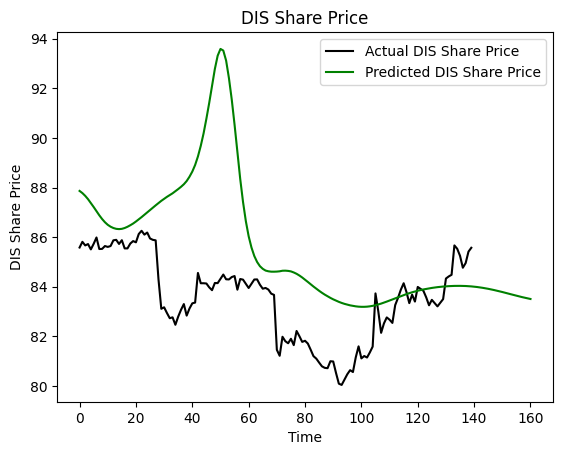

In [ ]:
plt.plot(actual_Info, color="black", label = f"Actual {company} Share Price")
plt.plot(predicted_prices, color="green", label= f"Predicted {company} Share Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

In [ ]:
real_data=[model_inputs[len(model_inputs) + 1 - prediction_hours:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction} ")



1/1 [==============================] - 3s 3s/step
Prediction: [[83.47704]] 
